# Importing Libraries

In [1]:
import numpy as     np
import pandas as     pd
from   scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm
import warnings
warnings.filterwarnings('ignore')

# Problem 1 - Wholesale Customers Analysis

In [2]:
df = pd.read_csv('Wholesale Customer.csv')
df.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  
0              2674          1338  
1              3293          1776  
2              3516          7844  
3               507          1788  
4              1777          5185

In [3]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

Based on the above output we can infer that there are no empty/null values present in the data set

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [4]:
print("Descriptive Statastics of Wholesale Customers Data:")
df.describe(include="all").T

Descriptive Statastics of Wholesale Customers Data:


count unique    top freq          mean           std   min  \
Buyer/Spender     440.0    NaN    NaN  NaN         220.5    127.161315   1.0   
Channel             440      2  Hotel  298           NaN           NaN   NaN   
Region              440      3  Other  316           NaN           NaN   NaN   
Fresh             440.0    NaN    NaN  NaN  12000.297727  12647.328865   3.0   
Milk              440.0    NaN    NaN  NaN   5796.265909   7380.377175  55.0   
Grocery           440.0    NaN    NaN  NaN   7951.277273   9503.162829   3.0   
Frozen            440.0    NaN    NaN  NaN   3071.931818   4854.673333  25.0   
Detergents_Paper  440.0    NaN    NaN  NaN   2881.493182   4767.854448   3.0   
Delicatessen      440.0    NaN    NaN  NaN   1524.870455   2820.105937   3.0   

                      25%     50%       75%       max  
Buyer/Spender      110.75   220.5    330.25     440.0  
Channel               NaN     NaN       NaN       NaN  
Region                NaN     NaN       NaN       NaN  
Fresh             3127.75  8504.0  16933.75  112151.0  
Milk               1533.0  3627.0   7190.25   73498.0  
Grocery            2153.0  4755.5  10655.75   92780.0  
Frozen             742.25  1526.0   3554.25   60869.0  
Detergents_Paper   256.75   816.5    3922.0   40827.0  
Delicatessen       408.25   965.5   1820.25   47943.0

In [5]:
df['Spending'] =df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  Spending  
0              2674          1338     34112  
1              3293          1776     33266  
2              3516          7844     36610  
3               507          1788     27381  
4              1777          5185     46100

In [6]:
df_r = df.groupby('Region')['Spending'].sum()
print(df_r)
print()
df_c = df.groupby('Channel')['Spending'].sum()
print(df_c)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


Highest spend in the Region is from Others and lowest spend in the region is from Oporto

Highest spend in the Channel is from Hotel and lowest spend in the Channel is from Retail.

In [7]:
df_sum = df.groupby(['Region','Channel'])['Spending'].sum()
print(df_sum)

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Spending, dtype: int64


Highest spending in the Region/Channel is from Others/Hotel

Lowest spending in the Region/Channel is from Oporto/Hotel

In [8]:
df_channel = df.drop(columns=['Buyer/Spender'],inplace=False)
df_final =  df_channel.drop(columns=['Spending'],inplace=False)
df_channel.groupby('Channel').mean().round(2)

Fresh      Milk   Grocery   Frozen  Detergents_Paper  \
Channel                                                            
Hotel    13475.56   3451.72   3962.14  3748.25            790.56   
Retail    8904.32  10716.50  16322.85  1652.61           7269.51   

         Delicatessen  Spending  
Channel                          
Hotel         1415.96  26844.19  
Retail        1753.44  46619.23

In Channel "Hotel" Average Highest Spending is in Fresh items and Lowest Spending is in Detergents_Paper.

In Channel "Retail" Average Highest Spending is in Grocery items and Lowest Spending is in Frozen items

In [9]:
df_region = df.drop(columns=['Buyer/Spender'])
df_region.groupby('Region').mean().round(2)

Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicatessen  \
Region                                                                        
Lisbon  11101.73  5486.42  7403.08  3000.34           2651.12        1354.9   
Oporto   9887.68  5088.17  9218.60  4045.36           3687.47        1159.7   
Other   12533.47  5977.09  7896.36  2944.59           2817.75        1620.6   

        Spending  
Region            
Lisbon  30997.57  
Oporto  33086.98  
Other   33789.87

In Region "Lisbon" Average Highest Spending is in Fresh and Lowest is in Delicatessen items.

In Region "Oporto" Average Highest Spending is in Fresh and Lowest is in Delicatessen items.

In Region "Other" Average Highest Spending is in Fresh and Lowest is in Delicatessen items.

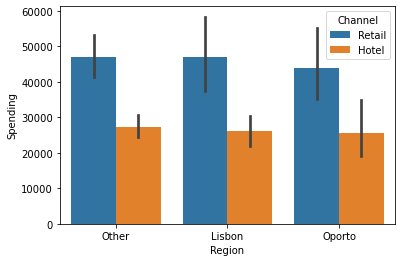

In [10]:
sns.barplot(x='Region',y='Spending',hue='Channel',data=df);

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

Text(0.5, 1.0, 'Item - Fresh')

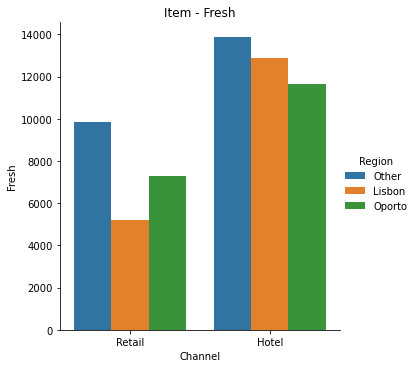

In [11]:
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=df);
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Milk')

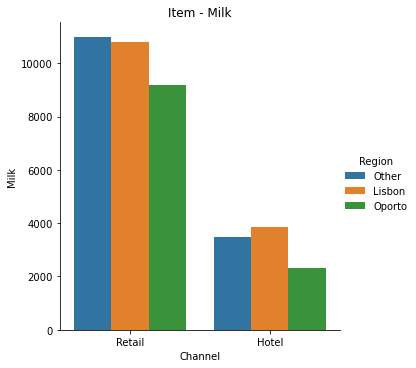

In [12]:
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=df);
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Grocery')

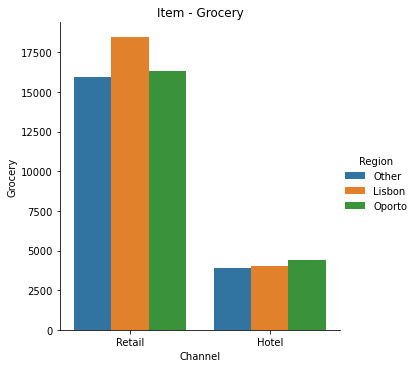

In [13]:
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=df);
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Frozen')

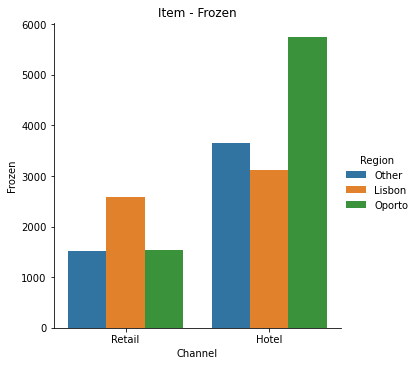

In [14]:
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=df);
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Detergents_Paper')

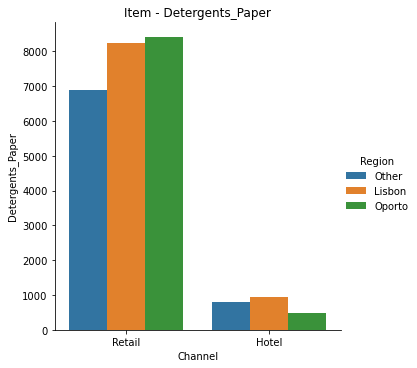

In [15]:
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=df);
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Delicatessen')

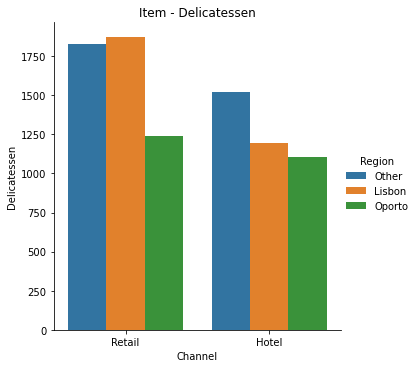

In [16]:
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=df);
plt.title('Item - Delicatessen')

Looking at the above output, we see that some categories like Milk, Grocery & Detergents_Paper have higher spend in the Retail channel across all regions. 

On the other hand, Fresh and Frozen have higher consumption in the Hotel channel across all regions.

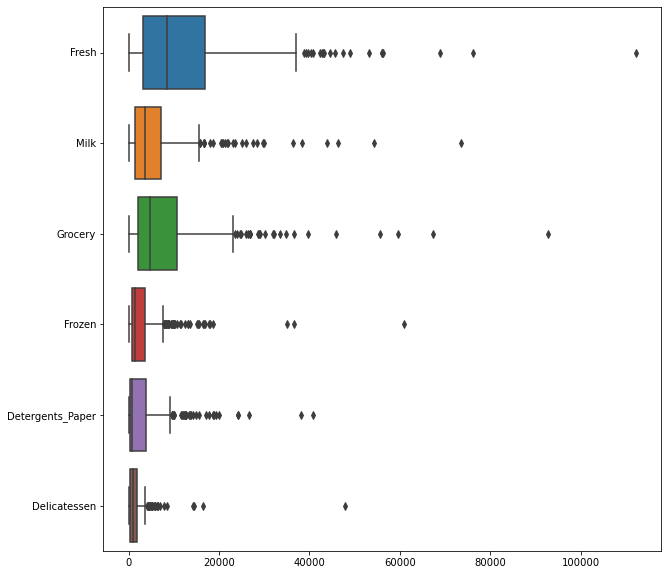

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_final,orient="h");

From the above box plot we can summarize that the spending for Fresh and groceries is the maximum across region and channel while for Delicatessen it is the least across region and channel

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [18]:
standard_deviation = df_final.std()
standard_deviation.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

Fresh item have highest Standard deviation So that is Inconsistent.

Delicatessen item have smallest Standard deviation, So that is consistent.

In [19]:
variance = df_final.var()
variance.round(2)

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952998e+06
dtype: float64

Fresh item have least variance and Delicatessen item have most variance.

So from the above data it is clear that most inconsistent behavior shown by item is Delicatessen
And least inconsistent behavior shown by item is Fresh

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

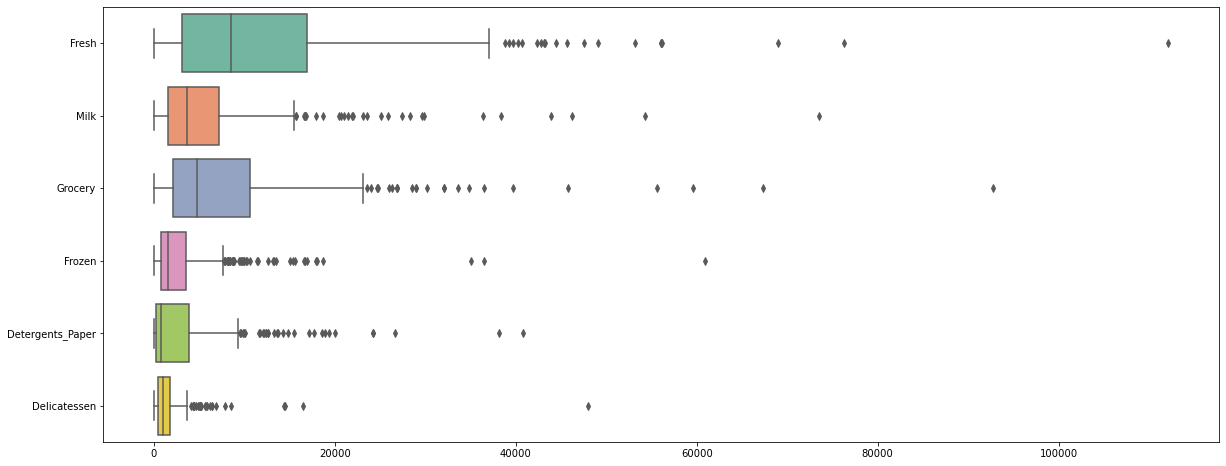

In [20]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_final, orient="h", palette="Set2");

There are outliers in all the items across the product range

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective 

As per the analysis, we can tell that:
There are inconsistencies in spending of different items which we found out by calculating the variance, which can be minimized. 

The spending of Hotel and Retail channel are different which can be more or less equal. 

Also the business can focus on other items also than “Fresh” and “Grocery” as well.

# Problem 2 - Clear Mountain State University (CMSU) Analysis

In [21]:
md = pd.read_csv('Survey-1.csv')
md.head()

ID  Gender  Age   Class       Major Grad Intention  GPA  Employment  \
0   1  Female   20  Junior       Other            Yes  2.9   Full-Time   
1   2    Male   23  Senior  Management            Yes  3.6   Part-Time   
2   3    Male   21  Junior       Other            Yes  2.5   Part-Time   
3   4    Male   21  Junior         CIS            Yes  2.5   Full-Time   
4   5    Male   23  Senior       Other      Undecided  2.8  Unemployed   

   Salary  Social Networking  Satisfaction  Spending Computer  Text Messages  
0    50.0                  1             3       350   Laptop            200  
1    25.0                  1             4       360   Laptop             50  
2    45.0                  2             4       600   Laptop            200  
3    40.0                  4             6       600   Laptop            250  
4    40.0                  2             4       500   Laptop            100

In [22]:
md.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

Based on above output we can infer that there are no null values

In [23]:
md.describe(include="all").T

count unique                  top freq        mean  \
ID                 62.0    NaN                  NaN  NaN        31.5   
Gender               62      2               Female   33         NaN   
Age                62.0    NaN                  NaN  NaN   21.129032   
Class                62      3               Senior   31         NaN   
Major                62      8  Retailing/Marketing   14         NaN   
Grad Intention       62      3                  Yes   28         NaN   
GPA                62.0    NaN                  NaN  NaN    3.129032   
Employment           62      3            Part-Time   43         NaN   
Salary             62.0    NaN                  NaN  NaN   48.548387   
Social Networking  62.0    NaN                  NaN  NaN    1.516129   
Satisfaction       62.0    NaN                  NaN  NaN    3.741935   
Spending           62.0    NaN                  NaN  NaN  482.016129   
Computer             62      3               Laptop   55         NaN   
Text Messages      62.0    NaN                  NaN  NaN  246.209677   

                          std    min    25%    50%    75%     max  
ID                  18.041619    1.0  16.25   31.5  46.75    62.0  
Gender                    NaN    NaN    NaN    NaN    NaN     NaN  
Age                  1.431311   18.0   20.0   21.0   22.0    26.0  
Class                     NaN    NaN    NaN    NaN    NaN     NaN  
Major                     NaN    NaN    NaN    NaN    NaN     NaN  
Grad Intention            NaN    NaN    NaN    NaN    NaN     NaN  
GPA                  0.377388    2.3    2.9   3.15    3.4     3.9  
Employment                NaN    NaN    NaN    NaN    NaN     NaN  
Salary              12.080912   25.0   40.0   50.0   55.0    80.0  
Social Networking    0.844305    0.0    1.0    1.0    2.0     4.0  
Satisfaction         1.213793    1.0    3.0    4.0    4.0     6.0  
Spending           221.953805  100.0  312.5  500.0  600.0  1400.0  
Computer                  NaN    NaN    NaN    NaN    NaN     NaN  
Text Messages       214.46595    0.0  100.0  200.0  300.0   900.0

2.1. For this data, construct the following contingency tables (Keep Gender as row variable) 

2.1.1. Gender and Major 

In [24]:
pd.crosstab(index=md['Gender'],columns=md['Major'])  

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3

2.1.2. Gender and Grad Intention 

In [25]:
pd.crosstab(index=md['Gender'],columns=md['Grad Intention'])  

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17

2.1.3. Gender and Employment 

In [26]:
pd.crosstab(index=md['Gender'],columns=md['Employment'])  

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3

2.1.4. Gender and Computer

In [27]:
pd.crosstab(index=md['Gender'],columns=md['Computer'])  

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0

2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question: 

2.2.1. What is the probability that a randomly selected CMSU student will be male? 

In [28]:
md['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [29]:
print("Total number of students: ",md['Gender'].count())

Total number of students:  62


In [30]:
print("The probability that a randomly selected CMSU student will be male is ",round((29/md['Gender'].count())*100,2),"%")

The probability that a randomly selected CMSU student will be male is  46.77 %


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [31]:
print("The probability that a randomly selected CMSU student will be female is ",round((33/md['Gender'].count())*100,2),"%")

The probability that a randomly selected CMSU student will be female is  53.23 %


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question: 

2.3.1. Find the conditional probability of different majors among the male students in CMSU. 

In [32]:
print("The probability that a male student is opting for Accounting is ",round((4/29)*100,2),"%")
print("The probability that a male student is opting for CIS is ",round((1/29)*100,2),"%")
print("The probability that a male student is opting for Economics/Finance is ",round((4/29)*100,2),"%")
print("The probability that a male student is opting for International Business is ",round((2/29)*100,2),"%")
print("The probability that a male student is opting for Management is ",round((6/29)*100,2),"%")
print("The probability that a male student is opting for Other is ",round((4/29)*100,2),"%")
print("The probability that a male student is opting for Retailing/Marketing is ",round((5/29)*100,2),"%")
print("The probability that a male student who have not decided on any major is ",round((3/29)*100,2),"%")

The probability that a male student is opting for Accounting is  13.79 %
The probability that a male student is opting for CIS is  3.45 %
The probability that a male student is opting for Economics/Finance is  13.79 %
The probability that a male student is opting for International Business is  6.9 %
The probability that a male student is opting for Management is  20.69 %
The probability that a male student is opting for Other is  13.79 %
The probability that a male student is opting for Retailing/Marketing is  17.24 %
The probability that a male student who have not decided on any major is  10.34 %


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [33]:
print("The probability that a female student is opting for Accounting is ",round((3/33)*100,2),"%")
print("The probability that a female student is opting for CIS is ",round((3/33)*100,2),"%")
print("The probability that a female student is opting for Economics/Finance is ",round((7/33)*100,2),"%")
print("The probability that a female student is opting for International Business is ",round((4/33)*100,2),"%")
print("The probability that a female student is opting for Management is ",round((4/33)*100,2),"%")
print("The probability that a female student is opting for Other is ",round((3/33)*100,2),"%")
print("The probability that a female student is opting for Retailing/Marketing is ",round((9/33)*100,2),"%")
print("The probability that a female student who have not decided on any major is ",round((0/33)*100,2),"%")

The probability that a female student is opting for Accounting is  9.09 %
The probability that a female student is opting for CIS is  9.09 %
The probability that a female student is opting for Economics/Finance is  21.21 %
The probability that a female student is opting for International Business is  12.12 %
The probability that a female student is opting for Management is  12.12 %
The probability that a female student is opting for Other is  9.09 %
The probability that a female student is opting for Retailing/Marketing is  27.27 %
The probability that a female student who have not decided on any major is  0.0 %


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [34]:
print("The probability that a randomly chosen student is a male and intends to graduate is ",round((17/29)*100,2),"%")

The probability that a randomly chosen student is a male and intends to graduate is  58.62 %


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [35]:
print("The probability that a randomly chosen student is a female does NOT have a laptop is ",round((4/33)*100,2),"%")

The probability that a randomly chosen student is a female does NOT have a laptop is  12.12 %


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [36]:
m = round((29/62)*100,4)
print("The probability that a randomly chosen student is a male ",m,"%")

The probability that a randomly chosen student is a male  46.7742 %


In [37]:
e = round((10/62)*100,4)
print("The probability that a randomly chosen student is a has full-time employment ",e,"%")

The probability that a randomly chosen student is a has full-time employment  16.129 %


In [38]:
me = round((7/62)*100,4)
print("The probability that a randomly chosen student is male and has full-time employment ",me,"%")

The probability that a randomly chosen student is male and has full-time employment  11.2903 %


In [39]:
m_final=round(m+e-me,2)
print("The probability that a randomly chosen student is male or has full-time employment ",m_final,"%")

The probability that a randomly chosen student is male or has full-time employment  51.61 %


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [40]:
print("The probability that given a female student is randomly chosen, she is majoring in international business or management is ",round((8/33)*100,2),"%")

The probability that given a female student is randomly chosen, she is majoring in international business or management is  24.24 %


2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [41]:
md_calc = md.drop(md[md['Grad Intention'] == 'Undecided'].index)
md_calc.head()

ID  Gender  Age   Class       Major Grad Intention  GPA  Employment  \
0   1  Female   20  Junior       Other            Yes  2.9   Full-Time   
1   2    Male   23  Senior  Management            Yes  3.6   Part-Time   
2   3    Male   21  Junior       Other            Yes  2.5   Part-Time   
3   4    Male   21  Junior         CIS            Yes  2.5   Full-Time   
8   9  Female   20  Junior  Management            Yes  3.6  Unemployed   

   Salary  Social Networking  Satisfaction  Spending Computer  Text Messages  
0    50.0                  1             3       350   Laptop            200  
1    25.0                  1             4       360   Laptop             50  
2    45.0                  2             4       600   Laptop            200  
3    40.0                  4             6       600   Laptop            250  
8    30.0                  0             4       500   Laptop            400

In [42]:
pd.crosstab(index=md['Gender'],columns=md_calc['Grad Intention'])

Grad Intention  No  Yes
Gender                 
Female           9   11
Male             3   17

In [43]:
pd.crosstab(index=md['Gender'],columns=md_calc['Grad Intention'],normalize='index')

Grad Intention    No   Yes
Gender                    
Female          0.45  0.55
Male            0.15  0.85

In [44]:
print("The probability that a randomly selected student is a female is ",round((20/40)*100,2),"%")

The probability that a randomly selected student is a female is  50.0 %


In [45]:
print("The probability that a randomly selected student is a female and intends to graduate is ",round((11/20)*100,2),"%")

The probability that a randomly selected student is a female and intends to graduate is  55.0 %


P(A U B) = P(A) + P(B) - P(A ∩ B)

P(Female U Yes) = P(Female) + P(Yes) - P(Female ∩ Yes)

They are not independent events

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [46]:
pd.crosstab(index=md['Gender']=='Male',columns=md['GPA']) 

GPA     2.3  2.4  2.5  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  \
Gender                                                                         
False     1    1    2    0    1    3    5    2    4    3    2    4    1    2   
True      0    0    4    2    2    1    2    5    2    2    5    2    2    0   

GPA     3.8  3.9  
Gender            
False     1    1  
True      0    0

In [47]:
# print("The probability that his/her GPA is less than 3 is ",round(((1+1+2+1+3+4+2+2+1)/62)*100,2),"%")
md_students = (md['GPA'] < 3).sum()
md_gpa =md_students/62
print('The probability that his/her GPA is less than 3 is', round(md_gpa*100,2), '%')

The probability that his/her GPA is less than 3 is 27.42 %


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [48]:
pd.crosstab(index=md['Gender']=='Male',columns=md['Salary']>=50,normalize='index' ) 

Salary     False      True
Gender                    
False   0.454545  0.545455
True    0.517241  0.482759

Probability that a randomly selected male earns 50 or more is 48.28%

In [49]:
pd.crosstab(index=md['Gender']=='Female',columns=md['Salary']>=50,normalize='index' ) 

Salary     False      True
Gender                    
False   0.517241  0.482759
True    0.454545  0.545455

Probability that a randomly selected female earns 50 or more is 54.55%

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

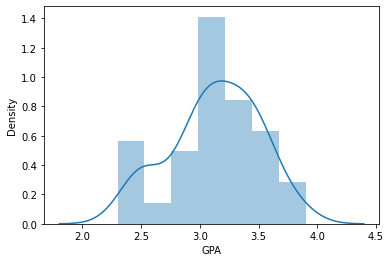

In [50]:
sns.distplot(x=md['GPA']);
plt.xlabel("GPA");

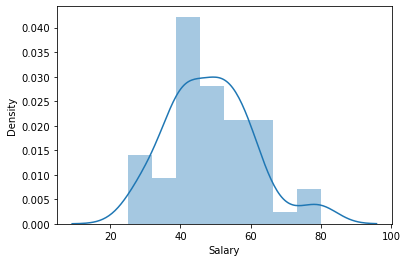

In [51]:
sns.distplot(x=md['Salary']);
plt.xlabel("Salary");

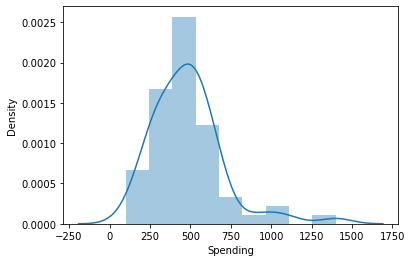

In [52]:
sns.distplot(x=md['Spending']);
plt.xlabel("Spending");

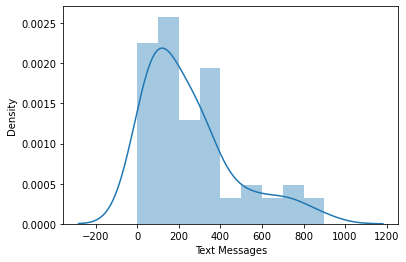

In [53]:
sns.distplot(x=md['Text Messages']);
plt.xlabel("Text Messages");

The distribution plots of all the numerical continuous variable seems to be almost normally distributed as shown above. Also, mean and median of all the variables are almost equal which is another evidence to say that they are normally distributed. All the variable satisfy the empirical law of are between (μ-3σ, μ+3σ) = 99.7 %

# Problem 3 - ABC asphalt shingles 

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps

In [54]:
mydata = pd.read_csv(r'C:\Users\ACER\Downloads\DSBA\Statitistical Mehods for Decision Making\Week - 4\A & B shingles-1.csv')
mydata.head()

A     B
0  0.44  0.14
1  0.61  0.15
2  0.47  0.31
3  0.30  0.16
4  0.15  0.37

In [55]:
t_statistic_A, p_value_A = ttest_1samp(mydata['A'], 0.35,nan_policy='omit')
print('One sample t test for A shingles \nt statistic: {0} p value: {1} '.format(t_statistic_A, p_value_A/2))

One sample t test for A shingles 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [56]:
t_statistic_B, p_value_B = ttest_1samp(mydata['B'], 0.35,nan_policy='omit')
print('One sample t test for B shingles \nt statistic: {0} p value: {1} '.format(t_statistic_B, p_value_B/2))

One sample t test for B shingles 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed

In [57]:
t_statistic, p_value  = ttest_ind(mydata['A'],mydata['B'],equal_var=True ,nan_policy='omit')
print('t statistic:',t_statistic)    
print('p value:',p_value)    

t statistic: 1.2896282719661123
p value: 0.2017496571835306
